In [1]:
# plotly and other data visualization tools rely on numpy arrays so import the numpy class
import numpy as np
import matplotlib.pyplot as plt
# grabs the information from other files like mat files
import scipy.io as sio
# create string value to mat file
matPath = 'data/2017_Pervious11_F5.mat'
# load the information in the file in a format that python can interpret
matfile = sio.loadmat(matPath)

# in order: for slab1 get date_time, rn, qh,qe,qg and sup
# s1_dates = matfile['S1']['D']
# manually make strings for the time intervals
days = ['20','21','22']
years = ['2017']
months = ['Jul']
# intialize all of the arrays that are going to be used to store all of the values
s1_dates, s1_rn, s1_sup, s1_sdn, s1_lup, s1_ldn, s3_rn, s4_rn, s6_rn, s8_rn, s1_rain  = [],[],[],[],[],[],[],[],[],[],[]
s1_amb, s1_st1, s1_st2, s1_st3, s1_st4, s1_usp, s1_soilt = [],[],[],[],[],[],[]
s1_e1, s1_e3, s1_e4, s1_vwc3, s1_vwc6, s1_ws, s1_bp, s1_rh = [],[],[],[],[],[],[],[]
s2_amb, s2_st1, s2_st2, s2_st3, s2_st4, s2_usp = [],[],[],[],[],[]
s3_amb, s3_st1, s3_st2, s3_st3, s3_st4, s3_usp = [],[],[],[],[],[]
s4_amb, s4_st1, s4_st2, s4_st3, s4_st4, s4_usp, s4_e1, s4_soilt3, s4_rain, s4_e3, s4_e4 = [],[],[],[],[],[],[],[],[],[],[]
s5_amb, s5_st1, s5_st2, s5_st3, s5_st4, s5_usp = [],[],[],[],[],[]
s6_amb, s6_st1, s6_st2, s6_st3, s6_st4, s6_usp = [],[],[],[],[],[]
s7_amb, s7_st1, s7_st2, s7_st3, s7_st4, s7_usp = [],[],[],[],[],[]
s8_amb, s8_st1, s8_st2, s8_st3, s8_st4, s8_usp = [],[],[],[],[],[]
s1_mh2o, s2_mh2o, s3_mh2o, s4_mh2o, s5_mh2o, s6_mh2o, s7_mh2o, s8_mh2o = [],[],[],[],[],[],[],[]

# if you want to expand, make more loops within the range of each parameter
# for months and years, 0 is only needed because there is only 1 value
for j in range(len(days)):
    for i in range(24): 
        s1_dates.append(days[j]+'-'+months[0]+'-'+years[0]+'-'+str(i)+':00:00')
s1_dates.append('23-Jul-2017-0:00:00')

# in the matfile, the values collected from Jul20 - Jul22 are within range 1440-576
for k in range(576,1452,12):
    # ts = temporary sum, these are used to hold the sums of a specified value for each hour since the data is currently spread in 5 minute intervals
    ts_s1_rn, ts_s1_sup, ts_s1_sdn, ts_s1_lup, ts_s1_ldn, ts_s3_rn, ts_s4_rn, ts_s6_rn, ts_s8_rn, ts_s1_rain = 0,0,0,0,0,0,0,0,0,0
    ts_s1_amb, ts_s1_st1, ts_s1_st2, ts_s1_st3, ts_s1_st4, ts_s1_usp, ts_s1_soilt = 0,0,0,0,0,0,0
    ts_s1_e1, ts_s1_e3, ts_s1_e4, ts_s1_vwc3, ts_s1_vwc6, ts_s1_ws, ts_s1_bp, ts_s1_rh = 0,0,0,0,0,0,0,0 
    ts_s2_amb, ts_s2_st1, ts_s2_st2, ts_s2_st3, ts_s2_st4, ts_s2_usp = 0,0,0,0,0,0
    ts_s3_amb, ts_s3_st1, ts_s3_st2, ts_s3_st3, ts_s3_st4, ts_s3_usp = 0,0,0,0,0,0
    ts_s4_amb, ts_s4_st1, ts_s4_st2, ts_s4_st3, ts_s4_st4, ts_s4_usp, ts_s4_e1, ts_s4_soilt3, ts_s4_rain, ts_s4_e3, ts_s4_e4 = 0,0,0,0,0,0,0,0,0,0,0
    ts_s5_amb, ts_s5_st1, ts_s5_st2, ts_s5_st3, ts_s5_st4, ts_s5_usp = 0,0,0,0,0,0
    ts_s6_amb, ts_s6_st1, ts_s6_st2, ts_s6_st3, ts_s6_st4, ts_s6_usp = 0,0,0,0,0,0
    ts_s7_amb, ts_s7_st1, ts_s7_st2, ts_s7_st3, ts_s7_st4, ts_s7_usp = 0,0,0,0,0,0
    ts_s8_amb, ts_s8_st1, ts_s8_st2, ts_s8_st3, ts_s8_st4, ts_s8_usp = 0,0,0,0,0,0
    ts_s1_mh2o, ts_s2_mh2o, ts_s3_mh2o, ts_s4_mh2o, ts_s5_mh2o, ts_s6_mh2o, ts_s7_mh2o, ts_s8_mh2o = 0,0,0,0,0,0,0,0
    # add up the values collected for each hour within each parameter
    for l in range(0,12):
        ts_s1_rn += float(matfile['S1']['RN'][0][0][k+l][0])
        ts_s3_rn += float(matfile['S3']['RN'][0][0][k+l][0])
        ts_s4_rn += float(matfile['S4']['RN'][0][0][k+l][0])
        ts_s6_rn += float(matfile['S6']['RN'][0][0][k+l][0])
        ts_s8_rn += float(matfile['S8']['RN'][0][0][k+l][0])
        ts_s1_sup += float(matfile['S1']['SUP'][0][0][k+l][0])
        ts_s1_sdn += float(matfile['S1']['SDN'][0][0][0][k+l])
        ts_s1_lup += float(matfile['S1']['LUP'][0][0][k+l][0])
        ts_s1_ldn += float(matfile['S1']['LDN'][0][0][k+l][0])
        ts_s1_rain += float(matfile['S1']['RAIN'][0][0][k+l][0])
        ts_s1_amb += float(matfile['S1']['AMB'][0][0][k+l][0])
        ts_s2_amb += float(matfile['S2']['AMB'][0][0][k+l][0])
        ts_s3_amb += float(matfile['S3']['AMB'][0][0][k+l][0])
        ts_s4_amb += float(matfile['S4']['AMB'][0][0][k+l][0])
        ts_s5_amb += float(matfile['S5']['AMB'][0][0][k+l][0])
        ts_s6_amb += float(matfile['S6']['AMB'][0][0][k+l][0])
        ts_s7_amb += float(matfile['S7']['AMB'][0][0][k+l][0])
        ts_s8_amb += float(matfile['S8']['AMB'][0][0][k+l][0])
        ts_s1_soilt += float(matfile['S1']['SOILT'][0][0][k+l][0])
        ts_s1_st1 += float(matfile['S1']['ST1'][0][0][k+l][0])
        ts_s2_st1 += float(matfile['S2']['ST1'][0][0][k+l][0])
        ts_s3_st1 += float(matfile['S3']['ST1'][0][0][k+l][0])
        ts_s4_st1 += float(matfile['S4']['ST1'][0][0][k+l][0])
        ts_s5_st1 += float(matfile['S5']['ST1'][0][0][k+l][0])
        ts_s6_st1 += float(matfile['S6']['ST1'][0][0][k+l][0])
        ts_s7_st1 += float(matfile['S7']['ST1'][0][0][k+l][0])
        ts_s8_st1 += float(matfile['S8']['ST1'][0][0][k+l][0])
        ts_s1_st2 += float(matfile['S1']['ST2'][0][0][k+l][0])
        ts_s2_st2 += float(matfile['S2']['ST2'][0][0][k+l][0])
        ts_s3_st2 += float(matfile['S3']['ST2'][0][0][k+l][0])
        ts_s4_st2 += float(matfile['S4']['ST2'][0][0][k+l][0])
        ts_s5_st2 += float(matfile['S5']['ST2'][0][0][k+l][0])
        ts_s6_st2 += float(matfile['S6']['ST2'][0][0][k+l][0])
        ts_s7_st2 += float(matfile['S7']['ST2'][0][0][k+l][0])
        ts_s8_st2 += float(matfile['S8']['ST2'][0][0][k+l][0])
        ts_s1_st3 += float(matfile['S1']['ST3'][0][0][k+l][0])
        ts_s2_st3 += float(matfile['S2']['ST3'][0][0][k+l][0])
        ts_s3_st3 += float(matfile['S3']['ST3'][0][0][k+l][0])
        ts_s4_st3 += float(matfile['S4']['ST3'][0][0][k+l][0])
        ts_s5_st3 += float(matfile['S5']['ST3'][0][0][k+l][0])
        ts_s6_st3 += float(matfile['S6']['ST3'][0][0][k+l][0])
        ts_s7_st3 += float(matfile['S7']['ST3'][0][0][k+l][0])
        ts_s8_st3 += float(matfile['S8']['ST3'][0][0][k+l][0])
        ts_s1_st4 += float(matfile['S1']['ST4'][0][0][k+l][0])
        ts_s2_st4 += float(matfile['S2']['ST4'][0][0][k+l][0])
        ts_s3_st4 += float(matfile['S3']['ST4'][0][0][k+l][0])
        ts_s4_st4 += float(matfile['S4']['ST4'][0][0][k+l][0])
        ts_s5_st4 += float(matfile['S5']['ST4'][0][0][k+l][0])
        ts_s6_st4 += float(matfile['S6']['ST4'][0][0][k+l][0])
        ts_s7_st4 += float(matfile['S7']['ST4'][0][0][k+l][0])
        ts_s8_st4 += float(matfile['S8']['ST4'][0][0][k+l][0])
        ts_s1_usp += float(matfile['S1']['USP'][0][0][k+l][0])
        ts_s2_usp += float(matfile['S2']['USP'][0][0][k+l][0])
        ts_s3_usp += float(matfile['S3']['USP'][0][0][k+l][0])
        ts_s4_usp += float(matfile['S4']['USP'][0][0][k+l][0])
        ts_s5_usp += float(matfile['S5']['USP'][0][0][k+l][0])
        ts_s6_usp += float(matfile['S6']['USP'][0][0][k+l][0])
        ts_s7_usp += float(matfile['S7']['USP'][0][0][k+l][0])
        ts_s8_usp += float(matfile['S8']['USP'][0][0][k+l][0])
        ts_s1_e1 += float(matfile['S1']['E1'][0][0][k+l][0])
        ts_s1_e3 += float(matfile['S1']['E3'][0][0][k+l][0])
        ts_s1_e4 += float(matfile['S1']['E4'][0][0][k+l][0])
        ts_s1_vwc3 += float(matfile['S1']['VWC3'][0][0][0][k+l])
        ts_s1_vwc6 += float(matfile['S1']['VWC6'][0][0][0][k+l])
        ts_s1_ws += float(matfile['S1']['WS'][0][0][k+l][0])
        ts_s1_bp += float(matfile['S1']['BP'][0][0][k+l][0])
        ts_s1_mh2o += float(matfile['S1']['MH2O'][0][0][k+l][0])
        ts_s2_mh2o += float(matfile['S2']['MH2O'][0][0][0][k+l])
        ts_s3_mh2o += float(matfile['S3']['MH2O'][0][0][k+l][0])
        ts_s4_mh2o += float(matfile['S4']['MH2O'][0][0][k+l][0])
        ts_s5_mh2o += float(matfile['S5']['MH2O'][0][0][0][k+l])
        ts_s6_mh2o += float(matfile['S6']['MH2O'][0][0][k+l][0])
        ts_s7_mh2o += float(matfile['S7']['MH2O'][0][0][0][k+l])
        ts_s8_mh2o += float(matfile['S8']['MH2O'][0][0][k+l][0])
        ts_s1_rh += float(matfile['S1']['RH'][0][0][k+l][0])
        ts_s4_e1 += float(matfile['S4']['E1'][0][0][k+l][0])
        ts_s4_soilt3 += float(matfile['S4']['SOILT3'][0][0][k+l][0])
        ts_s4_rain += float(matfile['S4']['RAIN'][0][0][k+l])
        ts_s4_e3 += float(matfile['S4']['E3'][0][0][k+l][0])
        ts_s4_e4 += float(matfile['S4']['E4'][0][0][k+l][0])
        
    # place the average for each parameter in the list for each parameter
    s1_rn.append(ts_s1_rn/12)
    s3_rn.append(ts_s3_rn/12)
    s4_rn.append(ts_s4_rn/12)
    s6_rn.append(ts_s6_rn/12)
    s8_rn.append(ts_s8_rn/12)
    s1_sup.append(ts_s1_sup/12)
    s1_sdn.append(ts_s1_sdn/12)
    s1_lup.append(ts_s1_lup/12)
    s1_ldn.append(ts_s1_ldn/12)
    s1_rain.append(ts_s1_rain/12)
    s1_amb.append(ts_s1_amb/12)
    s2_amb.append(ts_s2_amb/12)
    s3_amb.append(ts_s3_amb/12)
    s4_amb.append(ts_s4_amb/12)
    s5_amb.append(ts_s5_amb/12)
    s6_amb.append(ts_s6_amb/12)
    s7_amb.append(ts_s7_amb/12)
    s8_amb.append(ts_s8_amb/12)
    s1_st1.append(ts_s1_st1/12)
    s1_st2.append(ts_s1_st2/12)
    s1_st3.append(ts_s1_st3/12)
    s1_st4.append(ts_s1_st4/12)
    s1_usp.append(ts_s1_usp/12)
    s1_soilt.append(ts_s1_soilt/12)
    s2_st1.append(ts_s2_st1/12)
    s2_st2.append(ts_s2_st2/12)
    s2_st3.append(ts_s2_st3/12)
    s2_st4.append(ts_s2_st4/12)
    s2_usp.append(ts_s2_usp/12)
    s3_st1.append(ts_s3_st1/12)
    s3_st2.append(ts_s3_st2/12)
    s3_st3.append(ts_s3_st3/12)
    s3_st4.append(ts_s3_st4/12)
    s3_usp.append(ts_s3_usp/12)
    s4_st1.append(ts_s4_st1/12)
    s4_st2.append(ts_s4_st2/12)
    s4_st3.append(ts_s4_st3/12)
    s4_st4.append(ts_s4_st4/12)
    s4_usp.append(ts_s4_usp/12)
    s5_st1.append(ts_s5_st1/12)
    s5_st2.append(ts_s5_st2/12)
    s5_st3.append(ts_s5_st3/12)
    s5_st4.append(ts_s5_st4/12)
    s5_usp.append(ts_s5_usp/12)
    s6_st1.append(ts_s6_st1/12)
    s6_st2.append(ts_s6_st2/12)
    s6_st3.append(ts_s6_st3/12)
    s6_st4.append(ts_s6_st4/12)
    s6_usp.append(ts_s6_usp/12)
    s7_st1.append(ts_s7_st1/12)
    s7_st2.append(ts_s7_st2/12)
    s7_st3.append(ts_s7_st3/12)
    s7_st4.append(ts_s7_st4/12)
    s7_usp.append(ts_s7_usp/12)
    s8_st1.append(ts_s8_st1/12)
    s8_st2.append(ts_s8_st2/12)
    s8_st3.append(ts_s8_st3/12)
    s8_st4.append(ts_s8_st4/12)
    s8_usp.append(ts_s8_usp/12)
    s1_e1.append(ts_s1_e1/12)
    s1_e3.append(ts_s1_e3/12)
    s1_e4.append(ts_s1_e4/12)
    s1_vwc3.append(ts_s1_vwc3/12)
    s1_vwc6.append(ts_s1_vwc6/12)
    s1_ws.append(ts_s1_ws/12)
    s1_bp.append(ts_s1_bp/12)  
    s1_mh2o.append(ts_s1_mh2o/12) 
    s2_mh2o.append(ts_s2_mh2o/12) 
    s3_mh2o.append(ts_s3_mh2o/12) 
    s4_mh2o.append(ts_s4_mh2o/12) 
    s5_mh2o.append(ts_s5_mh2o/12) 
    s6_mh2o.append(ts_s6_mh2o/12) 
    s7_mh2o.append(ts_s7_mh2o/12) 
    s8_mh2o.append(ts_s8_mh2o/12)
    s1_rh.append(ts_s1_rh/12)
    s4_e1.append(ts_s4_e1/12)
    s4_soilt3.append(ts_s4_soilt3/12)
    s4_rain.append(ts_s4_rain/12)
    s4_e3.append(ts_s4_e3/12)
    s4_e4.append(ts_s4_e4/12)
    
# convert all of the lists generated before into numpy arrays so that they can be graphed
np_dates = np.array(s1_dates)
np_s1_rn = np.array(s1_rn)
np_s1_sup = np.array(s1_sup)
np_s1_sdn = np.array(s1_sdn)
np_s1_lup = np.array(s1_lup)
np_s1_ldn = np.array(s1_ldn)
np_s3_rn = np.array(s3_rn)
np_s4_rn = np.array(s4_rn)
np_s6_rn = np.array(s6_rn)
np_s8_rn = np.array(s8_rn)
np_s1_rain = np.array(s1_rain)
np_s1_amb = np.array(s1_amb)
np_s2_amb = np.array(s2_amb)
np_s3_amb = np.array(s3_amb)
np_s4_amb = np.array(s4_amb)
np_s5_amb = np.array(s5_amb)
np_s6_amb = np.array(s6_amb)
np_s7_amb = np.array(s7_amb)
np_s8_amb = np.array(s8_amb)
np_s1_st1 = np.array(s1_st1)
np_s1_st2 = np.array(s1_st2)
np_s1_st3 = np.array(s1_st3)
np_s1_st4 = np.array(s1_st4)
np_s1_usp = np.array(s1_usp)
np_s1_soilt = np.array(s1_soilt)
np_s2_st1 = np.array(s2_st1)
np_s2_st2 = np.array(s2_st2)
np_s2_st3 = np.array(s2_st3)
np_s2_st4 = np.array(s2_st4)
np_s2_usp = np.array(s2_usp)
np_s3_st1 = np.array(s3_st1)
np_s3_st2 = np.array(s3_st2)
np_s3_st3 = np.array(s3_st3)
np_s3_st4 = np.array(s3_st4)
np_s3_usp = np.array(s3_usp)
np_s4_st1 = np.array(s4_st1)
np_s4_st2 = np.array(s4_st2)
np_s4_st3 = np.array(s4_st3)
np_s4_st4 = np.array(s4_st4)
np_s4_usp = np.array(s4_usp)
np_s5_st1 = np.array(s5_st1)
np_s5_st2 = np.array(s5_st2)
np_s5_st3 = np.array(s5_st3)
np_s5_st4 = np.array(s5_st4)
np_s5_usp = np.array(s5_usp)
np_s6_st1 = np.array(s6_st1)
np_s6_st2 = np.array(s6_st2)
np_s6_st3 = np.array(s6_st3)
np_s6_st4 = np.array(s6_st4)
np_s6_usp = np.array(s6_usp)
np_s7_st1 = np.array(s7_st1)
np_s7_st2 = np.array(s7_st2)
np_s7_st3 = np.array(s7_st3)
np_s7_st4 = np.array(s7_st4)
np_s7_usp = np.array(s7_usp)
np_s8_st1 = np.array(s8_st1)
np_s8_st2 = np.array(s8_st2)
np_s8_st3 = np.array(s8_st3)
np_s8_st4 = np.array(s8_st4)
np_s8_usp = np.array(s8_usp)
np_s1_e1 = np.array(s1_e1)
np_s1_e3 = np.array(s1_e3)
np_s1_e4 = np.array(s1_e4)
np_s1_vwc3 = np.array(s1_vwc3)
np_s1_vwc6 = np.array(s1_vwc6)
np_s1_ws = np.array(s1_ws)
np_s1_bp = np.array(s1_bp)
np_s1_mh2o = np.array(s1_mh2o) 
np_s2_mh2o = np.array(s2_mh2o) 
np_s3_mh2o = np.array(s3_mh2o) 
np_s4_mh2o = np.array(s4_mh2o) 
np_s5_mh2o = np.array(s5_mh2o) 
np_s6_mh2o = np.array(s6_mh2o) 
np_s7_mh2o = np.array(s7_mh2o) 
np_s8_mh2o = np.array(s8_mh2o)
np_s1_rh = np.array(s1_rh)
np_s4_e1 = np.array(s4_e1)
np_s4_soilt3 = np.array(s4_soilt3)
np_s4_rain = np.array(s4_rain)
np_s4_e3 = np.array(s4_e3)
np_s4_e4 = np.array(s4_e4)
x = []
xlabels = []
xticks = []
xlim = (0,72)
for i in range(73): x.append(i)
for k in range(0,73,12): xticks.append(k)
for j in range(0,73,12): xlabels.append(np_dates[j])

C:\Users\mattanderson\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\io\matlab\mio.py:136: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


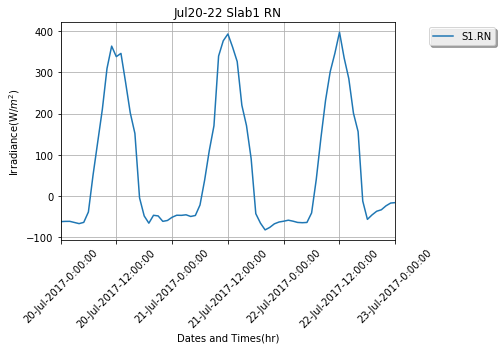

In [2]:
# Slab 1 Natural Radiation Plot 
fig1 = plt.plot(x, np_s1_rn, label='S1.RN')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim(xlim)
plt.xticks(xticks, xlabels, rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('Irradiance(W/$m^2$)')
plt.title('Jul20-22 Slab1 RN')
plt.grid(True)
plt.show()

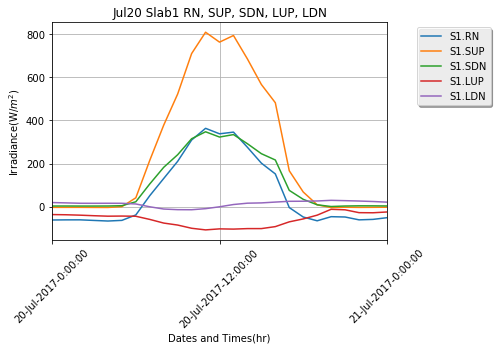

In [3]:
# Jul 20 slab1 en up sdn lup ldn
fig1 = plt.plot(x[0:25], np_s1_rn[0:25], label='S1.RN')
fig2 = plt.plot(x[0:25], np_s1_sup[0:25], label='S1.SUP')
fig3 = plt.plot(x[0:25], np_s1_sdn[0:25], label='S1.SDN')
fig4 = plt.plot(x[0:25], np_s1_lup[0:25], label='S1.LUP')
fig5 = plt.plot(x[0:25], np_s1_ldn[0:25], label='S1.LDN')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim((0,3))
plt.xticks(xticks[0:3], xlabels[0:3], rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('Irradiance(W/$m^2$)')
plt.title('Jul20 Slab1 RN, SUP, SDN, LUP, LDN')
plt.grid(True)
plt.show()

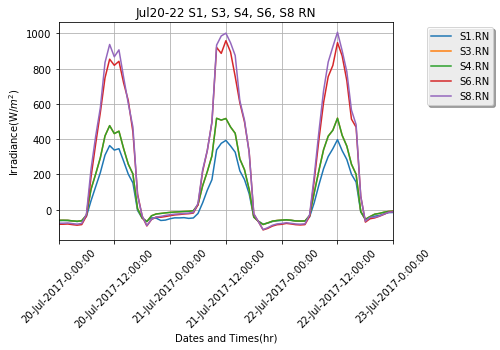

In [4]:
# Slab 1,3,4,6,8 net radiation
fig1 = plt.plot(x, np_s1_rn, label='S1.RN')
fig2 = plt.plot(x, np_s3_rn, label='S3.RN')
fig3 = plt.plot(x, np_s4_rn, label='S4.RN')
fig4 = plt.plot(x, np_s6_rn, label='S6.RN')
fig5 = plt.plot(x, np_s8_rn, label='S8.RN')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim(xlim)
plt.xticks(xticks, xlabels, rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('Irradiance(W/$m^2$)')
plt.title('Jul20-22 S1, S3, S4, S6, S8 RN')
plt.grid(True)
plt.show()

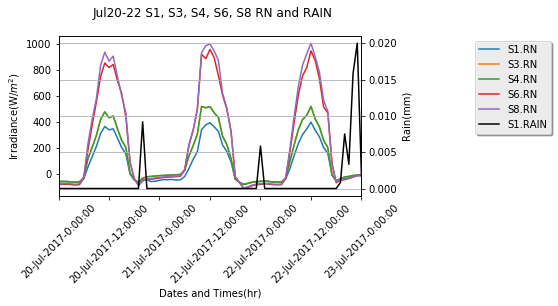

In [5]:
# Jul 20-22 slab 1,3,4,6,8 net radiation
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, np_s1_rn, label='S1.RN')
ax1.plot(x, np_s3_rn, label='S3.RN')
ax1.plot(x, np_s4_rn, label='S4.RN')
ax1.plot(x, np_s6_rn, label='S6.RN')
ax1.plot(x, np_s8_rn, label='S8.RN')
ax2.plot(x, np_s1_rain, 'k', label='S1.RAIN')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2,loc='upper center', bbox_to_anchor=(1.5, 1.0), shadow=True, ncol=1)
ax1.set_xlim(xlim)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels, rotation=45)
ax1.set_xlabel('Dates and Times(hr)')
ax1.set_ylabel('Irradiance(W/$m^2$)')
ax2.set_ylabel('Rain(mm)')
fig.tight_layout()
fig.suptitle('Jul20-22 S1, S3, S4, S6, S8 RN and RAIN', y =1.05)
plt.grid(True)
plt.show()

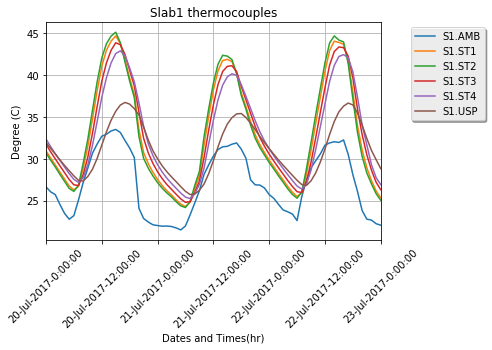

In [6]:
# Slab1 thermocouples plot
plt.plot(x, np_s1_amb, label='S1.AMB')
plt.plot(x, np_s1_st1, label='S1.ST1')
plt.plot(x, np_s1_st2, label='S1.ST2')
plt.plot(x, np_s1_st3, label='S1.ST3')
plt.plot(x, np_s1_st4, label='S1.ST4')
plt.plot(x, np_s1_usp, label='S1.USP')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim(xlim)
plt.xticks(xticks, xlabels, rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('Degree (C)')
plt.title('Slab1 thermocouples')
plt.grid(True)
plt.show()

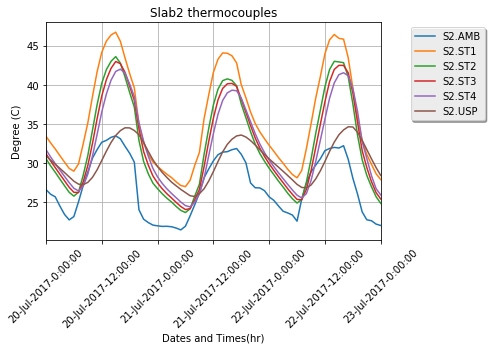

In [7]:
# Slab2 thermocouples plot
plt.plot(x, np_s2_amb, label='S2.AMB')
plt.plot(x, np_s2_st1, label='S2.ST1')
plt.plot(x, np_s2_st2, label='S2.ST2')
plt.plot(x, np_s2_st3, label='S2.ST3')
plt.plot(x, np_s2_st4, label='S2.ST4')
plt.plot(x, np_s2_usp, label='S2.USP')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim(xlim)
plt.xticks(xticks, xlabels, rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('Degree (C)')
plt.title('Slab2 thermocouples')
plt.grid(True)
plt.show()

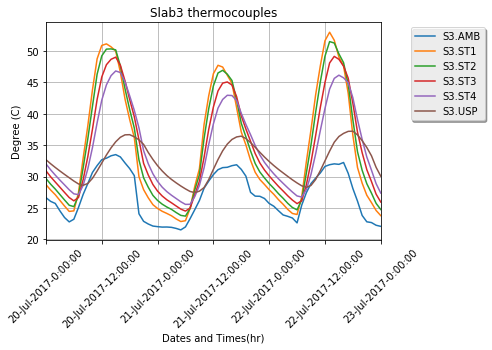

In [8]:
# Slab3 thermocouples plot
plt.plot(x, np_s3_amb, label='S3.AMB')
plt.plot(x, np_s3_st1, label='S3.ST1')
plt.plot(x, np_s3_st2, label='S3.ST2')
plt.plot(x, np_s3_st3, label='S3.ST3')
plt.plot(x, np_s3_st4, label='S3.ST4')
plt.plot(x, np_s3_usp, label='S3.USP')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim(xlim)
plt.xticks(xticks, xlabels, rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('Degree (C)')
plt.title('Slab3 thermocouples')
plt.grid(True)
plt.show()

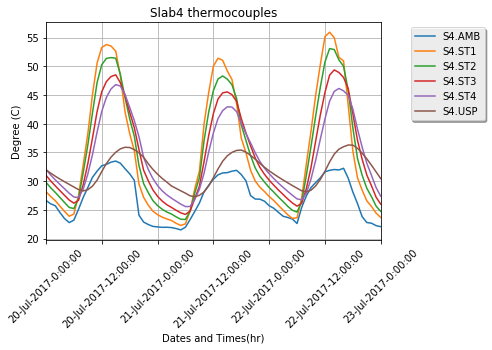

In [9]:
# Slab4 thermocouples plot
plt.plot(x, np_s4_amb, label='S4.AMB')
plt.plot(x, np_s4_st1, label='S4.ST1')
plt.plot(x, np_s4_st2, label='S4.ST2')
plt.plot(x, np_s4_st3, label='S4.ST3')
plt.plot(x, np_s4_st4, label='S4.ST4')
plt.plot(x, np_s4_usp, label='S4.USP')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim(xlim)
plt.xticks(xticks, xlabels, rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('Degree (C)')
plt.title('Slab4 thermocouples')
plt.grid(True)
plt.show()

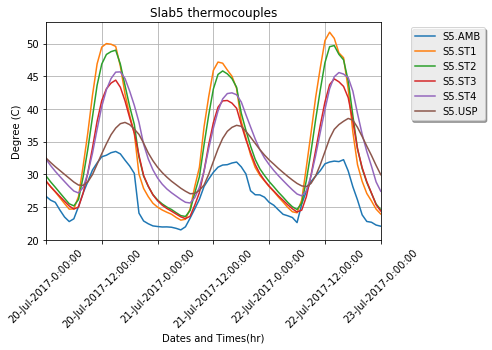

In [10]:
# Slab5 thermocouples plot
plt.plot(x, np_s5_amb, label='S5.AMB')
plt.plot(x, np_s5_st1, label='S5.ST1')
plt.plot(x, np_s5_st2, label='S5.ST2')
plt.plot(x, np_s5_st3, label='S5.ST3')
plt.plot(x, np_s5_st4, label='S5.ST4')
plt.plot(x, np_s5_usp, label='S5.USP')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim(xlim)
plt.xticks(xticks, xlabels, rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('Degree (C)')
plt.title('Slab5 thermocouples')
plt.grid(True)
plt.show()

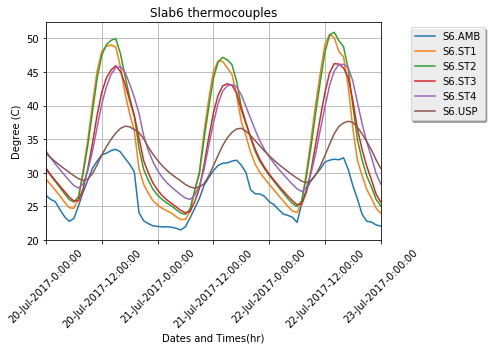

In [11]:
# Slab6 thermocouples plot
plt.plot(x, np_s6_amb, label='S6.AMB')
plt.plot(x, np_s6_st1, label='S6.ST1')
plt.plot(x, np_s6_st2, label='S6.ST2')
plt.plot(x, np_s6_st3, label='S6.ST3')
plt.plot(x, np_s6_st4, label='S6.ST4')
plt.plot(x, np_s6_usp, label='S6.USP')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim(xlim)
plt.xticks(xticks, xlabels, rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('Degree (C)')
plt.title('Slab6 thermocouples')
plt.grid(True)
plt.show()

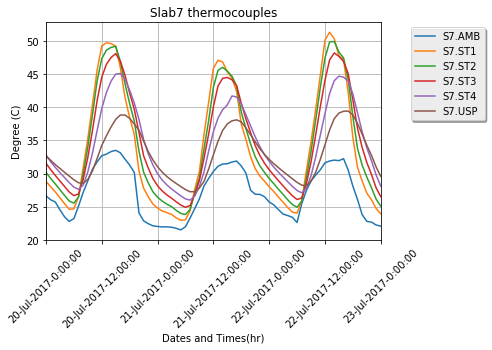

In [12]:
# Slab7 thermocouples plot
plt.plot(x, np_s7_amb, label='S7.AMB')
plt.plot(x, np_s7_st1, label='S7.ST1')
plt.plot(x, np_s7_st2, label='S7.ST2')
plt.plot(x, np_s7_st3, label='S7.ST3')
plt.plot(x, np_s7_st4, label='S7.ST4')
plt.plot(x, np_s7_usp, label='S7.USP')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim(xlim)
plt.xticks(xticks, xlabels, rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('Degree (C)')
plt.title('Slab7 thermocouples')
plt.grid(True)
plt.show()

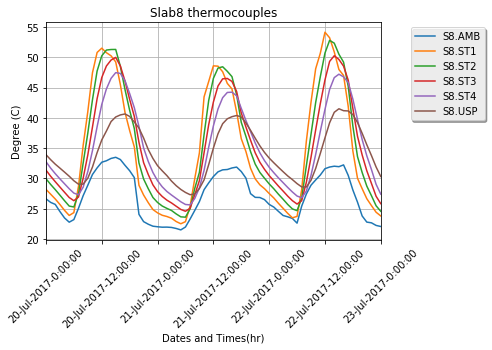

In [13]:
# Slab8 thermocouples plot
plt.plot(x, np_s8_amb, label='S8.AMB')
plt.plot(x, np_s8_st1, label='S8.ST1')
plt.plot(x, np_s8_st2, label='S8.ST2')
plt.plot(x, np_s8_st3, label='S8.ST3')
plt.plot(x, np_s8_st4, label='S8.ST4')
plt.plot(x, np_s8_usp, label='S8.USP')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=T# All slabs ST1 plot
plt.plot(x[0:25], np_s1_amb[0:25], label='S1.AMB')
plt.plot(x[0:25], np_s1_st1[0:25], label='S1.ST1')
plt.plot(x[0:25], np_s3_st1[0:25], label='S3.ST1')
plt.plot(x[0:25], np_s5_st1[0:25], label='S5.ST1')
plt.plot(x[0:25], np_s7_st1[0:25], label='S7.ST1')
plt.plot(x[0:25], np_s8_st1[0:25], label='S8.ST1')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim((0,3))
plt.xticks(xticks[0:3], xlabels[0:3], rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('Degree (C)')
plt.title('Jul20 Slabs_1_3_5_7_8 ST1')
plt.grid(True)
plt.show()rue, ncol=1)
plt.xlim(xlim)
plt.xticks(xticks, xlabels, rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('Degree (C)')
plt.title('Slab8 thermocouples')
plt.grid(True)
plt.show()

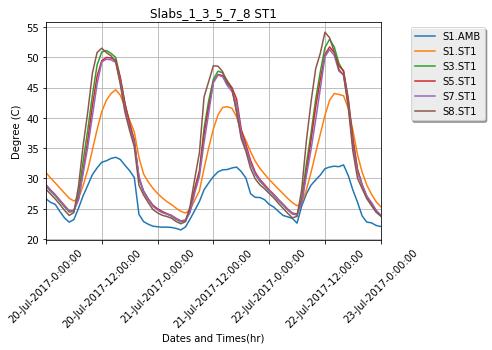

In [2]:
# All slabs ST1 plot
plt.plot(x, np_s1_amb, label='S1.AMB')
plt.plot(x, np_s1_st1, label='S1.ST1')
plt.plot(x, np_s3_st1, label='S3.ST1')
plt.plot(x, np_s5_st1, label='S5.ST1')
plt.plot(x, np_s7_st1, label='S7.ST1')
plt.plot(x, np_s8_st1, label='S8.ST1')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim(xlim)
plt.xticks(xticks, xlabels, rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('Degree (C)')
plt.title('Slabs_1_3_5_7_8 ST1')
plt.grid(True)
plt.show()

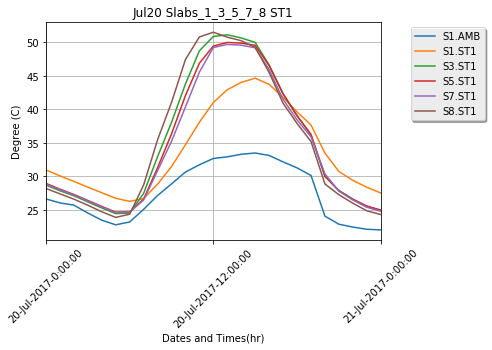

In [2]:
# All slabs ST1 plot
plt.plot(x[0:25], np_s1_amb[0:25], label='S1.AMB')
plt.plot(x[0:25], np_s1_st1[0:25], label='S1.ST1')
plt.plot(x[0:25], np_s3_st1[0:25], label='S3.ST1')
plt.plot(x[0:25], np_s5_st1[0:25], label='S5.ST1')
plt.plot(x[0:25], np_s7_st1[0:25], label='S7.ST1')
plt.plot(x[0:25], np_s8_st1[0:25], label='S8.ST1')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim((0,3))
plt.xticks(xticks[0:3], xlabels[0:3], rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('Degree (C)')
plt.title('Jul20 Slabs_1_3_5_7_8 ST1')
plt.grid(True)
plt.show()

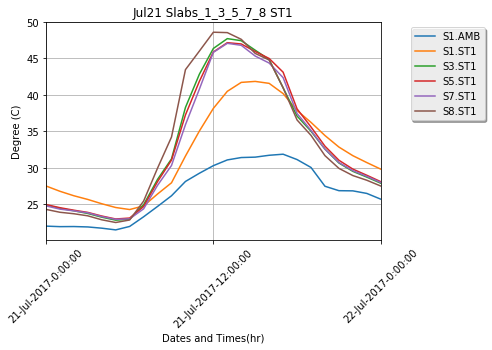

In [5]:
plt.plot(x[24:49], np_s1_amb[24:49], label='S1.AMB')
plt.plot(x[24:49], np_s1_st1[24:49], label='S1.ST1')
plt.plot(x[24:49], np_s3_st1[24:49], label='S3.ST1')
plt.plot(x[24:49], np_s5_st1[24:49], label='S5.ST1')
plt.plot(x[24:49], np_s7_st1[24:49], label='S7.ST1')
plt.plot(x[24:49], np_s8_st1[24:49], label='S8.ST1')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim((24,36))
plt.xticks(xticks[2:5], xlabels[2:5], rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('Degree (C)')
plt.title('Jul21 Slabs_1_3_5_7_8 ST1')
plt.grid(True)
plt.show()

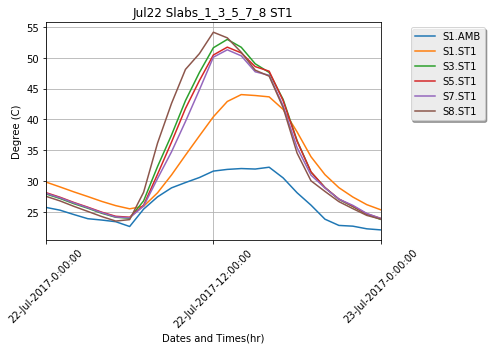

In [6]:
plt.plot(x[48:73], np_s1_amb[48:73], label='S1.AMB')
plt.plot(x[48:73], np_s1_st1[48:73], label='S1.ST1')
plt.plot(x[48:73], np_s3_st1[48:73], label='S3.ST1')
plt.plot(x[48:73], np_s5_st1[48:73], label='S5.ST1')
plt.plot(x[48:73], np_s7_st1[48:73], label='S7.ST1')
plt.plot(x[48:73], np_s8_st1[48:73], label='S8.ST1')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim((48,72))
plt.xticks(xticks[4:7], xlabels[4:7], rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('Degree (C)')
plt.title('Jul22 Slabs_1_3_5_7_8 ST1')
plt.grid(True)
plt.show()

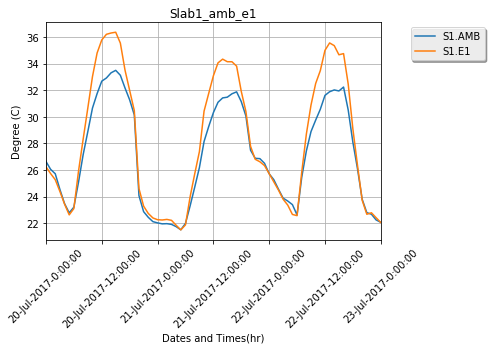

In [17]:
# Slab1 amb e1 plot
plt.plot(x, np_s1_amb, label='S1.AMB')
plt.plot(x, np_s1_e1, label='S1.E1')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim(xlim)
plt.xticks(xticks, xlabels, rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('Degree (C)')
plt.title('Slab1_amb_e1')
plt.grid(True)
plt.show()

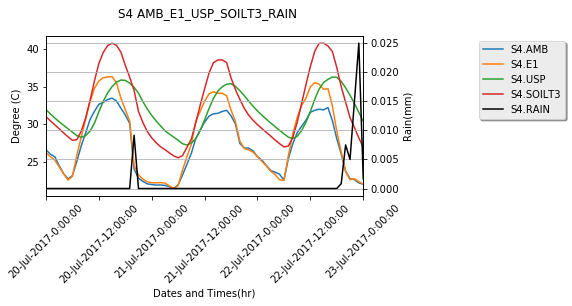

In [34]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, np_s4_amb, label='S4.AMB')
ax1.plot(x, np_s4_e1, label='S4.E1')
ax1.plot(x, np_s4_usp, label='S4.USP')
ax1.plot(x, np_s4_soilt3, label='S4.SOILT3')
ax2.plot(x, np_s4_rain, 'k', label='S4.RAIN')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2,loc='upper center', bbox_to_anchor=(1.5, 1.0), shadow=True, ncol=1)
ax1.set_xlim(xlim)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels, rotation=45)
ax1.set_xlabel('Dates and Times(hr)')
ax1.set_ylabel('Degree (C)')
ax2.set_ylabel('Rain(mm)')
fig.tight_layout()
fig.suptitle('S4 AMB_E1_USP_SOILT3_RAIN', y =1.05)
plt.grid(True)
plt.show()

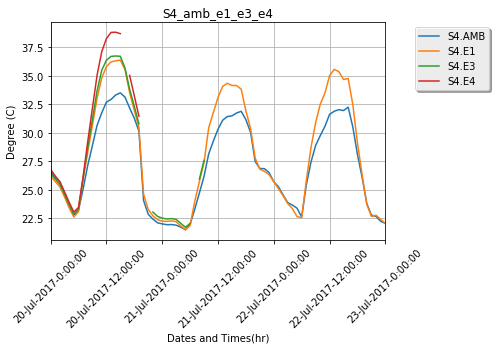

In [8]:
# Slab4 amb e1 e3 and e4 plot
plt.plot(x, np_s4_amb, label='S4.AMB')
plt.plot(x, np_s4_e1, label='S4.E1')
plt.plot(x, np_s4_e3, label='S4.E3')
plt.plot(x, np_s4_e4, label='S4.E4')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim(xlim)
plt.xticks(xticks, xlabels, rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('Degree (C)')
plt.title('S4_amb_e1_e3_e4')
plt.grid(True)
plt.show()

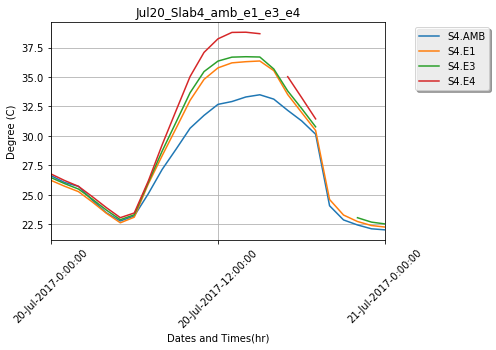

In [36]:
# Slab4 amb e1 e3 and e4 plot
plt.plot(x[0:25], np_s4_amb[0:25], label='S4.AMB')
plt.plot(x[0:25], np_s4_e1[0:25], label='S4.E1')
plt.plot(x[0:25], np_s4_e3[0:25], label='S4.E3')
plt.plot(x[0:25], np_s4_e4[0:25], label='S4.E4')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim((0,24))
plt.xticks(xticks[0:3], xlabels[0:3], rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('Degree (C)')
plt.title('Jul20_Slab4_amb_e1_e3_e4')
plt.grid(True)
plt.show()

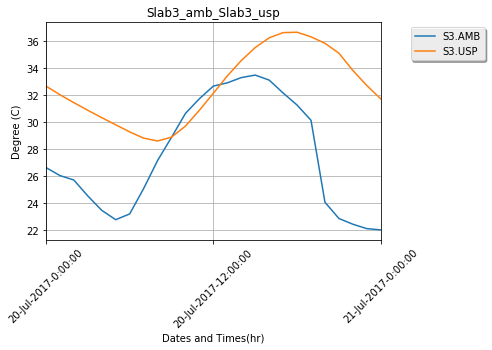

In [9]:
# Slab3 amb and usp plot
plt.plot(x[0:25], np_s3_amb[0:25], label='S3.AMB')
plt.plot(x[0:25], np_s3_usp[0:25], label='S3.USP')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim((0,24))
plt.xticks(xticks[0:3], xlabels[0:3], rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('Degree (C)')
plt.title('Slab3_amb_Slab3_usp')
plt.grid(True)
plt.show()

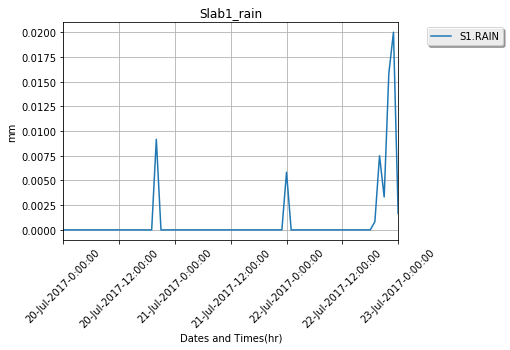

In [21]:
# Slab1 rain
plt.plot(x, np_s1_rain, label='S1.RAIN')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim(xlim)
plt.xticks(xticks, xlabels, rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('mm')
plt.title('Slab1_rain')
plt.grid(True)
plt.show()

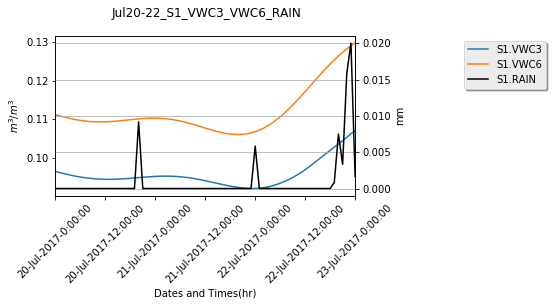

In [37]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, np_s1_vwc3, label='S1.VWC3')
ax1.plot(x, np_s1_vwc6, label='S1.VWC6')
ax2.plot(x, np_s1_rain, 'k', label='S1.RAIN')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2,loc='upper center', bbox_to_anchor=(1.5, 1.0), shadow=True, ncol=1)
ax1.set_xlim(xlim)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels, rotation=45)
ax1.set_xlabel('Dates and Times(hr)')
ax1.set_ylabel('$m^3$/$m^3$')
ax2.set_ylabel('mm')
fig.tight_layout()
fig.suptitle('Jul20-22_S1_VWC3_VWC6_RAIN', y =1.05)
plt.grid(True)
plt.show()

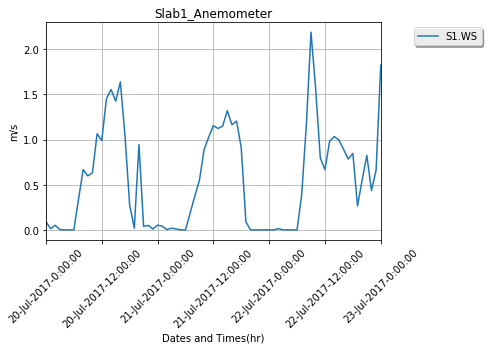

In [38]:
# Slab1 Anemometer
plt.plot(x, np_s1_ws, label='S1.WS')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim(xlim)
plt.xticks(xticks, xlabels, rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('m/s')
plt.title('Slab1_Anemometer')
plt.grid(True)
plt.show()

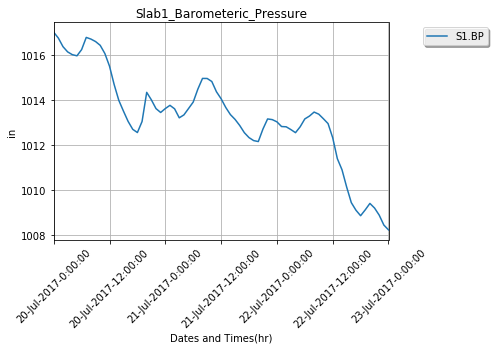

In [24]:
# Slab1 Anemometer
plt.plot(x, np_s1_bp, label='S1.BP')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim(xlim)
plt.xticks(xticks, xlabels, rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('in')
plt.title('Slab1_Barometeric_Pressure')
plt.grid(True)
plt.show()

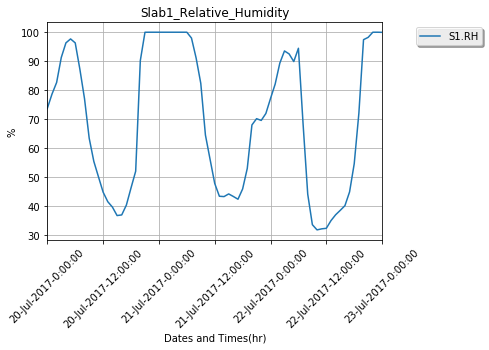

In [25]:
# Slab1 Anemometer
plt.plot(x, np_s1_rh, label='S1.RH')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim(xlim)
plt.xticks(xticks, xlabels, rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('%')
plt.title('Slab1_Relative_Humidity')
plt.grid(True)
plt.show()

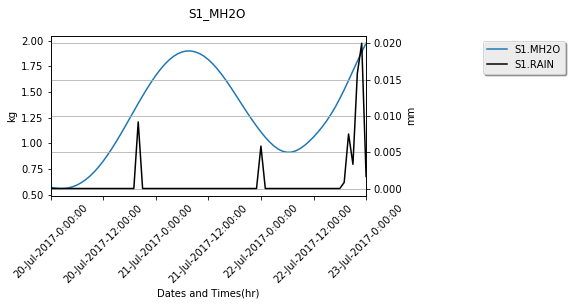

In [26]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, np_s1_mh2o, label='S1.MH2O')
ax2.plot(x, np_s1_rain, 'k', label='S1.RAIN')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2,loc='upper center', bbox_to_anchor=(1.5, 1.0), shadow=True, ncol=1)
ax1.set_xlim(xlim)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels, rotation=45)
ax1.set_xlabel('Dates and Times(hr)')
ax1.set_ylabel('kg')
ax2.set_ylabel('mm')
fig.tight_layout()
fig.suptitle('S1_MH2O', y =1.05)
plt.grid(True)
plt.show()

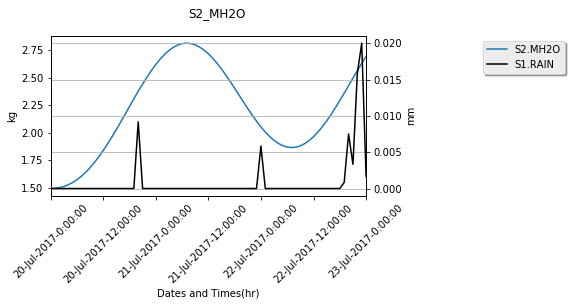

In [27]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, np_s2_mh2o, label='S2.MH2O')
ax2.plot(x, np_s1_rain, 'k', label='S1.RAIN')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2,loc='upper center', bbox_to_anchor=(1.5, 1.0), shadow=True, ncol=1)
ax1.set_xlim(xlim)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels, rotation=45)
ax1.set_xlabel('Dates and Times(hr)')
ax1.set_ylabel('kg')
ax2.set_ylabel('mm')
fig.tight_layout()
fig.suptitle('S2_MH2O', y =1.05)
plt.grid(True)
plt.show()

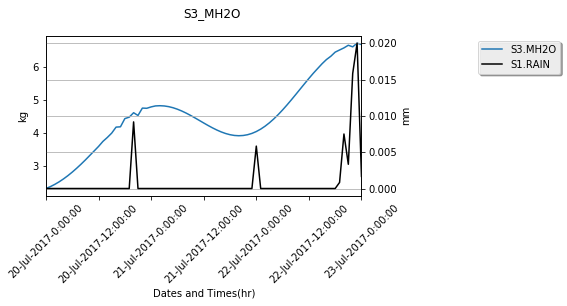

In [28]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, np_s3_mh2o, label='S3.MH2O')
ax2.plot(x, np_s1_rain, 'k', label='S1.RAIN')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2,loc='upper center', bbox_to_anchor=(1.5, 1.0), shadow=True, ncol=1)
ax1.set_xlim(xlim)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels, rotation=45)
ax1.set_xlabel('Dates and Times(hr)')
ax1.set_ylabel('kg')
ax2.set_ylabel('mm')
fig.tight_layout()
fig.suptitle('S3_MH2O', y =1.05)
plt.grid(True)
plt.show()

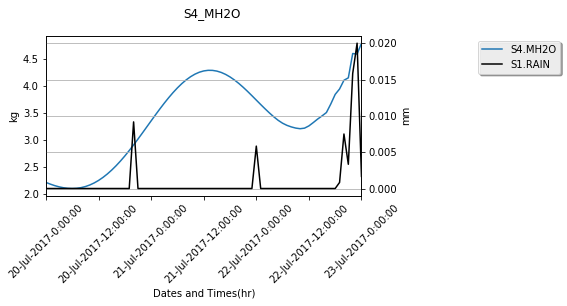

In [29]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, np_s4_mh2o, label='S4.MH2O')
ax2.plot(x, np_s1_rain, 'k', label='S1.RAIN')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2,loc='upper center', bbox_to_anchor=(1.5, 1.0), shadow=True, ncol=1)
ax1.set_xlim(xlim)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels, rotation=45)
ax1.set_xlabel('Dates and Times(hr)')
ax1.set_ylabel('kg')
ax2.set_ylabel('mm')
fig.tight_layout()
fig.suptitle('S4_MH2O', y =1.05)
plt.grid(True)
plt.show()

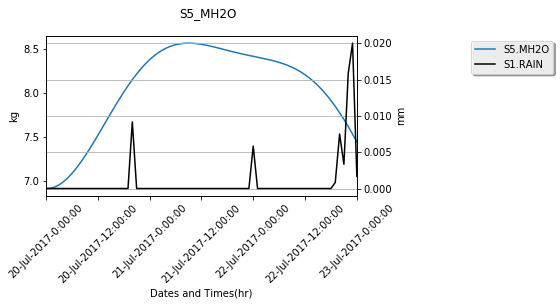

In [30]:
# Slab5 mh2o
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, np_s5_mh2o, label='S5.MH2O')
ax2.plot(x, np_s1_rain, 'k', label='S1.RAIN')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2,loc='upper center', bbox_to_anchor=(1.5, 1.0), shadow=True, ncol=1)
ax1.set_xlim(xlim)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels, rotation=45)
ax1.set_xlabel('Dates and Times(hr)')
ax1.set_ylabel('kg')
ax2.set_ylabel('mm')
fig.tight_layout()
fig.suptitle('S5_MH2O', y =1.05)
plt.grid(True)
plt.show()

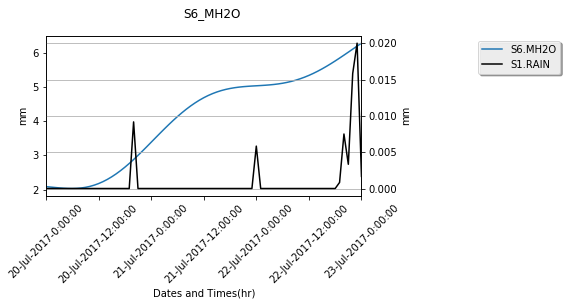

In [31]:
# Slab6 mh2o
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, np_s6_mh2o, label='S6.MH2O')
ax2.plot(x, np_s1_rain, 'k', label='S1.RAIN')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2,loc='upper center', bbox_to_anchor=(1.5, 1.0), shadow=True, ncol=1)
ax1.set_xlim(xlim)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels, rotation=45)
ax1.set_xlabel('Dates and Times(hr)')
ax1.set_ylabel('mm')
ax2.set_ylabel('mm')
fig.tight_layout()
fig.suptitle('S6_MH2O', y =1.05)
plt.grid(True)
plt.show()

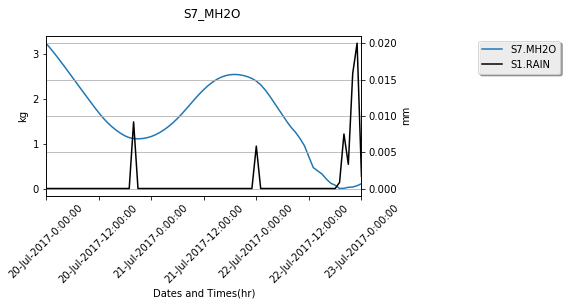

In [32]:
# Slab7 mh2o
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, np_s7_mh2o, label='S7.MH2O')
ax2.plot(x, np_s1_rain, 'k', label='S1.RAIN')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2,loc='upper center', bbox_to_anchor=(1.5, 1.0), shadow=True, ncol=1)
ax1.set_xlim(xlim)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels, rotation=45)
ax1.set_xlabel('Dates and Times(hr)')
ax1.set_ylabel('kg')
ax2.set_ylabel('mm')
fig.tight_layout()
fig.suptitle('S7_MH2O', y =1.05)
plt.grid(True)
plt.show()

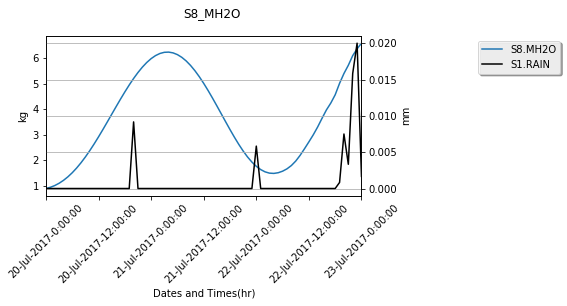

In [33]:
# Slab8 mh2o
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, np_s8_mh2o, label='S8.MH2O')
ax2.plot(x, np_s1_rain, 'k', label='S1.RAIN')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2,loc='upper center', bbox_to_anchor=(1.5, 1.0), shadow=True, ncol=1)
ax1.set_xlim(xlim)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels, rotation=45)
ax1.set_xlabel('Dates and Times(hr)')
ax1.set_ylabel('kg')
ax2.set_ylabel('mm')
fig.tight_layout()
fig.suptitle('S8_MH2O', y =1.05)
plt.grid(True)
plt.show()

In [7]:
# load all the analyzed information int a matfile

import scipy.io as sio
import collections as c
matPath = 'data/Averaged_2017_Pervious11_F5.mat'
mat = c.defaultdict(dict)
mat['S1']['D'] = np_dates 
mat['S2']['D'] = np_dates 
mat['S3']['D'] = np_dates 
mat['S4']['D'] = np_dates 
mat['S5']['D'] = np_dates 
mat['S6']['D'] = np_dates 
mat['S7']['D'] = np_dates 
mat['S8']['D'] = np_dates 
mat['S1']['RN'] = np_s1_rn
mat['S1']['SUP'] = np_s1_sup 
mat['S1']['SDN'] = np_s1_sdn 
mat['S1']['LUP'] = np_s1_lup 
mat['S1']['LDN'] = np_s1_ldn 
mat['S3']['RN'] = np_s3_rn
mat['S4']['RN'] = np_s4_rn
mat['S6']['RN'] = np_s6_rn
mat['S8']['RN'] = np_s8_rn
mat['S1']['RAIN'] = np_s1_rain
mat['S1']['AMB'] = np_s1_amb 
mat['S2']['AMB'] = np_s2_amb 
mat['S3']['AMB'] = np_s3_amb 
mat['S4']['AMB'] = np_s4_amb 
mat['S5']['AMB'] = np_s5_amb 
mat['S6']['AMB'] = np_s6_amb 
mat['S7']['AMB'] = np_s7_amb 
mat['S8']['AMB'] = np_s8_amb 
mat['S1']['ST1'] = np_s1_st1 
mat['S1']['ST2'] = np_s1_st2 
mat['S1']['ST3'] = np_s1_st3 
mat['S1']['ST4'] = np_s1_st4 
mat['S1']['USP'] = np_s1_usp 
mat['S1']['SOILT'] = np_s1_soilt
mat['S2']['ST1'] = np_s2_st1 
mat['S2']['ST2'] = np_s2_st2 
mat['S2']['ST3'] = np_s2_st3 
mat['S2']['ST4'] = np_s2_st4 
mat['S2']['USP'] = np_s2_usp 
mat['S3']['ST1'] = np_s3_st1 
mat['S3']['ST2'] = np_s3_st2 
mat['S3']['ST3'] = np_s3_st3 
mat['S3']['ST4'] = np_s3_st4 
mat['S3']['USP'] = np_s3_usp 
mat['S4']['ST1'] = np_s4_st1 
mat['S4']['ST2'] = np_s4_st2 
mat['S4']['ST3'] = np_s4_st3 
mat['S4']['ST4'] = np_s4_st4 
mat['S4']['USP'] = np_s4_usp 
mat['S5']['ST1'] = np_s5_st1 
mat['S5']['ST2'] = np_s5_st2 
mat['S5']['ST3'] = np_s5_st3 
mat['S5']['ST4'] = np_s5_st4 
mat['S5']['USP'] = np_s5_usp 
mat['S6']['ST1'] = np_s6_st1 
mat['S6']['ST2'] = np_s6_st2 
mat['S6']['ST3'] = np_s6_st3 
mat['S6']['ST4'] = np_s6_st4 
mat['S6']['USP'] = np_s6_usp 
mat['S7']['ST1'] = np_s7_st1 
mat['S7']['ST2'] = np_s7_st2 
mat['S7']['ST3'] = np_s7_st3 
mat['S7']['ST4'] = np_s7_st4 
mat['S7']['USP'] = np_s7_usp 
mat['S8']['ST1'] = np_s8_st1 
mat['S8']['ST2'] = np_s8_st2 
mat['S8']['ST3'] = np_s8_st3 
mat['S8']['ST4'] = np_s8_st4 
mat['S8']['USP'] = np_s8_usp 
mat['S1']['E1'] = np_s1_e1
mat['S1']['E3'] = np_s1_e3
mat['S1']['E4'] = np_s1_e4
mat['S1']['VWC3'] = np_s1_vwc3
mat['S1']['VWC6'] = np_s1_vwc6
mat['S1']['WS'] = np_s1_ws
mat['S1']['BP'] = np_s1_bp
mat['S1']['MH2O'] = np_s1_mh2o 
mat['S2']['MH2O'] = np_s2_mh2o 
mat['S3']['MH2O'] = np_s3_mh2o 
mat['S4']['MH2O'] = np_s4_mh2o 
mat['S5']['MH2O'] = np_s5_mh2o 
mat['S6']['MH2O'] = np_s6_mh2o 
mat['S7']['MH2O'] = np_s7_mh2o 
mat['S8']['MH2O'] = np_s8_mh2o
mat['S1']['RH'] = np_s1_rh
sio.savemat('data/Averaged_2017_Pervious11_F5.mat', mat)
